# Lecture 8 - Git Branching and Merging, Continuous Integration

## Contents

1. [Git Branching and Merging](#git)
2. [Continuous Integration](#ci)
3. [Demonstration](#demo)
4. [Conclusion](#conclusion)
5. [Further Reading](#further-reading)

## 1. Git Branching and Merging <a class="anchor" id="git"></a>

- Branches are powerful tools which allow multiple versions of a repository to be developed in parallel and later recombined.


- Typically, a repository will have a **mainline branch** or **trunk** (usually called `master` or `main`) which is considered stable and correct.


- Development is done on so-called **feature branches**, which originate from another branch, often the trunk. In this way, the trunk remains unaffected as work is carried out on the feature branch.


- Once a new feature is complete and correct, the feature branch is then **merged** into the trunk.


- Git's lightweight branching model is also incredibly useful for **ad-hoc experimentation**. Got an idea for how to make your code better/faster/more elegant? Just create a new branch and try it out, safe in the knowledge that the mainline remains unaffected. If it works, merge it. If it doesn't, simply delete the branch and move on.

### 1.1. Commits
- To understand Git branching, we first need to revisit the concept of a Git commit.


- Remember that **a commit is simply a pointer to a snapshot of your repository**.


- The initial commit of your repository might look something like this:

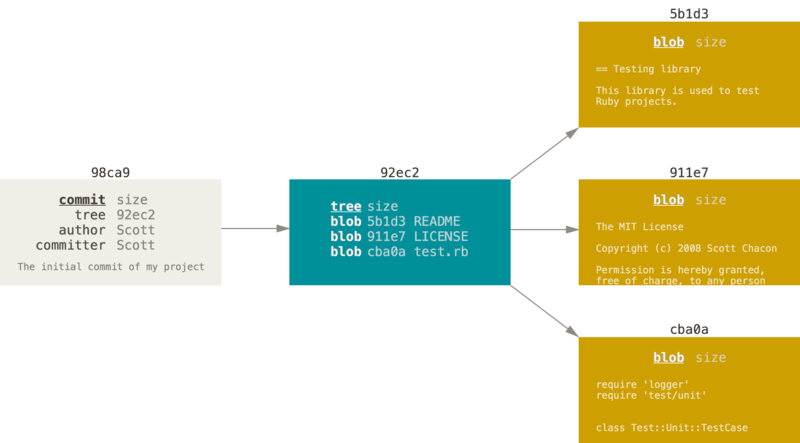


- Subsequent commits also contain a pointer to their parent commit, in addition to the usual pointer to the repository snapshot:

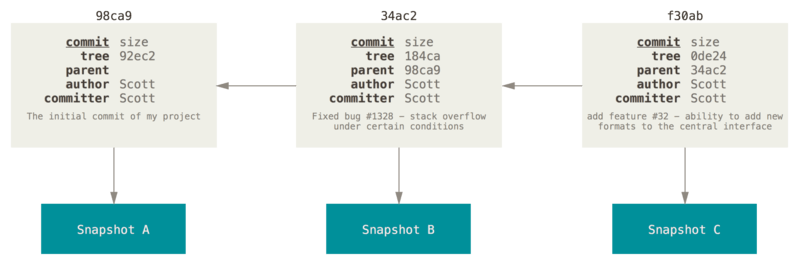


- In this way, commits are a record of the entire development history of your project.

### 1.2. Branches

- In Git, **a branch is simply a pointer to a commit**.


- Suppose we begin with one branch, called `master`, and we want to create a new branch, called `testing`, in order to make some experimental changes. Our repository now looks something like this:

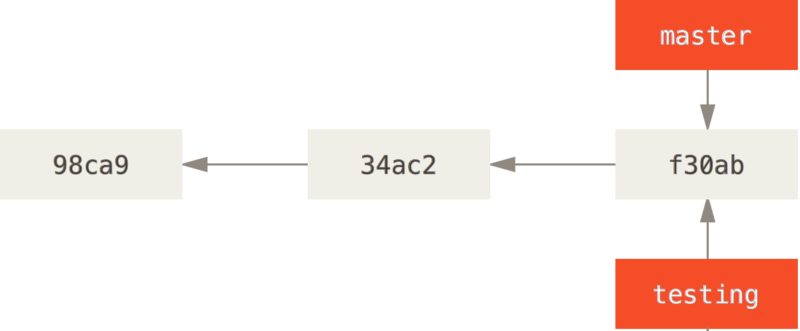


- Both of these branches point to the same commit, meaning they are  currently identical. But they are free to diverge. 


- Suppose we make some changes on the `testing` branch and commit them. Now our repository looks like this:

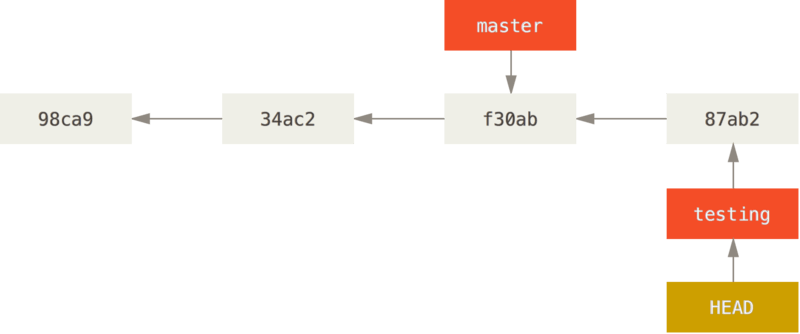

- The master branch still points to the same commit; it is completely unchanged and unaffected by work on the `testing` branch.


- The testing branch now points to the new commit which contains our experimental changes.


- Note also the pointer called `HEAD`. This tells us what branch we are on currently, in this case `testing`.

### 1.3. Merging

- Suppose you succesfully complete some work on the `testing` branch and want to incorporate those changes into the trunk. That is, you want to merge the changes you made on the `testing` branch into the `master` branch.


- Suppose also that the `master` branch has changed since you created the branch. The situation looks something like this (where the branch `iss53` in the image takes the place of our `testing` branch):

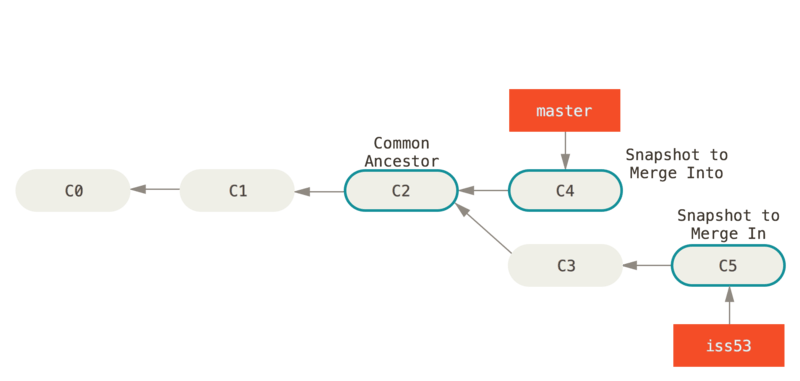


- To merge our changes, we would simply change to the `master` branch and do `git merge testing`.


- In response to this command, Git will perform a **three-way merge**, meaning that it compares:  

    1. The branch being merged in.
    2. The branch being merged into.
    3. Their common ancestor.
    
and figures out how to combine them.


- After the merge, our repository looks like:

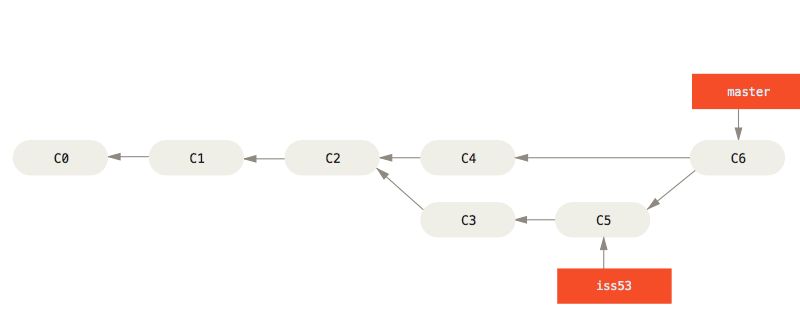

where the commit `C6` is a **merge commit**, combining the changes from the two branches.


- If you're done with the `testing` branch, you're now free to delete it, as the code has been incorporated into `master`.

### 1.4. Pull Requests

- When working on collaborative projects, code is usually merged into the trunk by opening a [pull request](https://docs.github.com/en/pull-requests/collaborating-with-pull-requests/proposing-changes-to-your-work-with-pull-requests/about-pull-requests) (PR) on GitHub.


- A pull request should really be called a **merge request**: in general, you are requesting to merge the changes you've made on your feature branch into the project's `master` or `main` branch.


- Combined with **code review**, pull requests are an essential mechanism for ensuring **quality control** in collaborative projects. However, even when working alone, they are a useful feature for inspecting your code before merging it.


- A common workflow is:  
    1. Push your code changes to your branch on GitHub.
    2. Open a PR on GitHub, requesting to merge your branch into the project's `master` or `main` branch.
    3. Request a code review from an appropriate colleague or collaborator.
    4. They will review your code and either **request changes** or **approve** it.
    5. If changes have been requested, address them and then go back to step 3.
    6. Once your code is finally approved, you can merge it into the base branch.
    
    
- We will demonstrate this later.

### 1.5. Conflicts

- It can occur that multiple branches change the same line(s) of code. In this case, Git can't know which changes to give priority and the three-way merge will fail. This is known as a **merge conflict**.


- When this happens you need to manually tell Git how to combine the two branches - this process is known **resolving conflicts**. In the majority of cases this is straightforward, but occasionally it can be tedious.


- The details of how to resolve conflicts are unfortunately beyond the scope of this lecture, but in the event that you encounter merge conflicts, don't worry! Just refer to the [documentation](https://git-scm.com/book/en/v2/Git-Branching-Basic-Branching-and-Merging) and follow the guidance there.

### 1.6. Git Commands for Branching and Merging

#### 1.6.1. List Branches

- To list all of the branches in the current repository, do:

`git branch`

#### 1.6.2. Create a New Branch

- To create a new branch, do:

`git branch <new-branch-name>`

#### 1.6.3. Switch Branches

- To switch to another branch, do:

`git checkout <branch-to-checkout>`

- Note that we very often want to create a branch and immediately switch to that branch. In that case use the `-b` flag with `git checkout`:

`git checkout -b <new-branch-name>`

- Another useful shortcut is:

`git checkout -`

which switches to the last branch you were on.

#### 1.6.4. Merge Branches

- To merge a branch into the current branch, do:

`git merge <branch-to-merge-in>`

#### 1.6.5. Delete a Branch

- To delete a branch, do:

`git branch -d <branch-to-delete>`

#### 1.6.6. Push Changes to GitHub

- Once you've comitted your changes on your local branch, to add those changes to your upstream (GitHub) repository, just do:


`git push`

#### 1.6.7. Get Changes from GitHub
- Suppose there are changes on a branch in a remote repository (i.e. GitHub) which you don't have in your equivalent local branch. This often happens when a collaborator has merged changes into the trunk, for example.


- To get those changes from GitHub and merge them into your equivalent local branch, change to that branch and do:

`git pull`


- This is equivalent to the following two commands, performed sequentially:

`git fetch`  
`git merge`

and you are encouraged to look this up in the [documentation](https://git-scm.com/book/en/v2/Git-Branching-Remote-Branches).

## 2. Continuous Integration <a class="anchor" id="ci"></a>

- Continuous integration (CI) is a software development practice where developers regularly (~daily) merge their code changes into a central trunk, for example, the `main` branch on a central GitHub repository.


- One of the main reasons for practising CI is to avoid merge conflicts.


- The longer a feature branch exists without being merged into the trunk, the more likely it is that there will be conflicting changes and therefore nasty merge conflicts. This is especially true for large projects with many developers. This is one reason why CI is widely adopted as a best practice in software development.


- Even if you're the only person working on a project, CI is still a valuable tool:  
    - You may have multiple feature branches under development in parallel, for example a small bug fix (short-lived) vs. a complicated new feature (long-lived).  
    - Regularly merging your code into the trunk forces you to keep your code modular and allows bugs to be quickly identified and rectified or reversed.
    - Automated testing allows you to quickly identify issues with your code.

### 2.1. Automated Testing
- An essential feature of CI, and the one we'll focus on today, is automated testing.


- Last week, you learned how to test your code in Julia. Writing comprehensive unit tests, and automating them using CI tools, will allow you to rapidly develop your Julia package without fear of breaking existing functionality. This in turn gives you great freedom to iterate and experiment with your code.


- What do we actually mean by automating our unit tests? In this instance, we mean that everytime we push our code changes to GitHub, the tests in our project will be automatically run against the source code. All of this happens on GitHub's servers.


- There are many CI tools you could integrate with GitHub in order to automate testing of your Julia packages. Some well-known examples are Jenkins, CircleCI, Travis CI, and GitHub Actions. We'll use [GitHub Actions](https://github.com/features/actions) because it is so easy to integrate with our GitHub repositories.


- The easiest way to set up GitHub Actions in your Julia projects is to simply include it as a plugin in your PkgTemplates templates. For example:

In [5]:
using PkgTemplates

template = Template(
    plugins = [
        GitHubActions(),  # See PkgTemplates docs for all of the configuration options
    ],
);

- Along with all of the usual files for your Julia package, this will also create a file `.github/CI.yml` which contains the config GitHub needs to automatically run your tests.


- The file looks like this:

```yaml
name: CI
on:
  push:
    branches:
      - main
    tags: '*'
  pull_request:
concurrency:
  # Skip intermediate builds: always.
  # Cancel intermediate builds: only if it is a pull request build.
  group: ${{ github.workflow }}-${{ github.ref }}
  cancel-in-progress: ${{ startsWith(github.ref, 'refs/pull/') }}
jobs:
  test:
    name: Julia ${{ matrix.version }} - ${{ matrix.os }} - ${{ matrix.arch }} - ${{ github.event_name }}
    runs-on: ${{ matrix.os }}
    strategy:
      fail-fast: false
      matrix:
        version:
          - '1.0'
          - '1.7'
        os:
          - ubuntu-latest
        arch:
          - x64
    steps:
      - uses: actions/checkout@v2
      - uses: julia-actions/setup-julia@v1
        with:
          version: ${{ matrix.version }}
          arch: ${{ matrix.arch }}
      - uses: julia-actions/cache@v1
      - uses: julia-actions/julia-buildpkg@v1
      - uses: julia-actions/julia-runtest@v1

```

- With a comprehensive suite of automated tests in hand, you are free to practise CI, regularly merging your code changes into the trunk.

## 3. Demonstration <a class="anchor" id="demo"></a>

- We will now demonstrate everything we've learned in this lecture.


- After the lecture, we will upload a recording of the demonstration to accompany this notebook.


- The actions we'll demonstrate are roughly as follows:


1. Use PkgTemplates to create a new Julia project, including CI, containing an implementation of the Lorenz '63 model.
2. Create an empty repository on GitHub and set it up as a remote repository for our project.
3. Create a new branch and add the equations of motion for the Lorenz system:
```julia
function lorenz63(u, p, t)
    x, y, z = u
    σ, ρ, β = p
    
    dx = σ * (y - x)
    dy = x * (ρ - z) - y
    dz = x * y - β * z
    
    return dx, dy, dz
end
```

4. Merge the branch into `main`.
5. Push the changes to the `main` branch on GitHub.
6. Create a new branch and add a test for the equations of motion:

```julia
@testset "lorenz63.jl" begin
    u = [1.0, 1.0, 1.0]
    p = [10.0, 8 / 3, 28.0]
    t = 0.0
    @test all(lorenz63(u, p, t) .≈ (0.0, 2/3, -27.0))
end
```

7. Push the branch to GitHub and open a pull request to merge our changes into the `main` branch.
8. Merge the pull request on GitHub.
9. Pull the changes (on the `main` branch) down to our local repository.
10. Create another new branch and add some default function arguments to `lorenz63`.
11. Push the branch to GitHub and open a pull request to merge our changes into the `main` branch. Do the tests pass?

## 4. Conclusion <a class="anchor" id="conclusion"></a>

- The tools we've used in this lecture - Git branches and continuous integration - are ubiquitous best practices. There's a good reason for this: they massively enhance the productivity of developers.


- As well as your expertise in the Julia programming language itself, you now have everything you need to start developing high quality Julia packages:  

    1. How to create a well-structured Julia project using PkgTemplates.jl.
    2. How to manage your programming environment using Pkg.jl.
    3. How to write tests for your project and automate them using GitHub Actions.
    4. How to document your project using Documenter.jl.
    5. How to practise version control using Git and GitHub.

## 5. Further Reading <a class="anchor" id="further-reading"></a>

1. Git Branching and Merging  
    a. [Git book](https://git-scm.com/book/en/v2/Git-Branching-Branches-in-a-Nutshell)  
    b. [Git docs](https://git-scm.com/docs/git-branch)  
    c. [Learn Git Branching (interactive tutorial)](https://learngitbranching.js.org/)  
    d. [GitHub docs](https://docs.github.com/en/pull-requests/collaborating-with-pull-requests/proposing-changes-to-your-work-with-pull-requests/about-branches)
2. Continuous Integration  
    a. [Wikipedia](https://en.wikipedia.org/wiki/Continuous_integration)  
    b. [GitHub Actions](https://github.com/features/actions)  
    c. [Julia CI](https://github.com/JuliaCI)